**Customer Churn Prediction**

"A Bank wants to take care of it’s customer retention for its product."
The bank wants to identify customers likely to churn balances below the minimum balance. 

**Data** :

The dataset which can be cleanly divided in 3 categories:

Demographic information about customers:
customer_id 

vintage

age 

gender

dependents

occupation

city 

Customer Bank Relationship:
customer_nw_category 

branch_code

days_since_last_transaction 

Transactional Information :
current_balance 

previous_month_end_balance

average_monthly_balance_prevQ

average_monthly_balance_prevQ2 

current_month_credit 

previous_month_credit 

current_month_debit 

previous_month_debit 

current_month_balance 

previous_month_balance 

churn - Average balance of customer falls below minimum balance in the next quarter (1/0)

**Load Packages**

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import random as rd
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LG
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [257]:
#Load Data
df=pd.read_csv('churn_prediction.csv')

In [258]:
df.shape

(28382, 21)

In [260]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

**Missing Vaue Imputation**

In [261]:
df['gender'].fillna(value=df['gender'].mode()[0],inplace=True)

In [262]:
df=df.astype({"customer_nw_category" : 'object',"churn" : 'object'})

In [263]:
df['occupation'].fillna(value=df['occupation'].mode()[0],inplace=True)

In [264]:
df['dependents'].fillna(value=df['dependents'].mode()[0],inplace=True)

In [265]:
df['city'].fillna(value=df['city'].mean(),inplace=True)

In [266]:
df['days_since_last_transaction'].fillna(value=df['days_since_last_transaction'].mean(),inplace=True)

In [267]:
df.shape

(28382, 21)

In [268]:
df['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [269]:
df['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

**Preprocessing**

In [270]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

df['gender'] = df['gender'].fillna(-1)

In [271]:
df.shape

(28382, 21)

In [272]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [273]:
data=pd.get_dummies(df['occupation'])

In [274]:
df=pd.concat([data,df],axis=1)

In [275]:
df.drop(['occupation'],axis=1,inplace=True)

In [276]:
df.head(30)

,company,retired,salaried,self_employed,student,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0,0,0,1,0,1,3135,66,1,0.0,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,0,0,0,1,0,2,310,35,1,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,0,0,1,0,0,4,2356,31,1,0.0,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,0,0,0,1,0,5,478,90,1,0.0,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,0,0,0,1,0,6,2531,42,1,2.0,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,0,0,0,1,0,7,263,42,0,0.0,1096.000000,2,1666,60.000000,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,0,1,0,0,0,8,5922,72,1,0.0,1020.000000,1,1,98.000000,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,0,0,0,1,0,9,1145,46,1,0.0,623.000000,2,317,172.000000,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,0,0,1,0,0,10,2132,31,1,0.0,1096.000000,2,4110,19.000000,1355.86,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,0,0,0,1,0,11,3379,40,1,3.0,1020.000000,2,38,0.000000,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


**Normalize**

In [277]:
num_cols = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

#for i in num_cols:
 #   df[i] = np.log(df[i] + 17000)


In [216]:
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [217]:
df_df_og = df.copy()
df = df.drop(['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance'],axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [218]:
X=df.drop(['churn', 'customer_id'],axis=1)
y=df['churn']

Baseline Column

In [219]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'retired', 'salaried','self_employed', 'student']

In [220]:
df_baseline = df[baseline_cols]

**Train_Test_Split**

In [221]:
train_X,test_X,train_y,test_y= train_test_split(df_baseline,y,random_state=56,test_size=0.2,stratify=y)

In [222]:
train_X.shape

(22705, 9)

In [223]:
test_X.shape

(5677, 9)

In [224]:
train_y.shape

(22705,)

In [225]:
test_y.shape

(5677,)

**Logistic Regression**

In [226]:
lg=LG()

In [170]:
train_y.shape

(22705,)

In [171]:
train_y.head(20)

5102     0
1428     0
12337    0
9826     0
20876    0
10564    0
3659     0
27226    0
23398    0
558      0
3260     0
14400    1
16939    0
13932    0
12210    0
27610    1
5995     0
6        0
8519     0
26727    0
Name: churn, dtype: object

In [172]:
type(train_X)

pandas.core.frame.DataFrame

In [173]:
type(train_y)

pandas.core.series.Series

In [227]:
train_y=list(train_y)

In [228]:
lg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
pred = lg.predict_proba(test_X)[:,1]


f1 score calculation

In [230]:
train_predict=lg.predict(train_X)

In [231]:
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
k=f1_score(train_predict,train_y)

In [233]:
print('training f1_score',k)

training f1_score 0.012192262602579131


In [234]:
test_predict=lg.predict(test_X)

In [235]:
test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [236]:
type(test_predict)

numpy.ndarray

In [237]:
type(test_y)

pandas.core.series.Series

In [238]:
test_y=list(test_y)

In [239]:
k=f1_score(test_predict,test_y)

In [240]:
print('test_score',k)   #  checking model success

test_score 0.018691588785046728


In [278]:
df.head()

,company,retired,salaried,self_employed,student,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0,0,0,1,0,1,3135,66,1,0.0,187.000000,2,755,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,0,0,0,1,0,2,310,35,1,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,0,0,1,0,0,4,2356,31,1,0.0,146.000000,2,41,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,0,0,0,1,0,5,478,90,1,0.0,1020.000000,2,582,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,0,0,0,1,0,6,2531,42,1,2.0,1494.000000,3,388,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


*cross validation*

In [354]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    # print(df1[['current_month_debit']].head())
    df1 = df[cols]
    print(df1.head())
    y1 = list(y)
    
     # 5 Fold cross validation stratified on the basis of target
    kf= StratifiedKFold(n_splits=3,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y1):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        print("{} {}".format(df_index, test_index))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        # ytr,yvl = y1[df_index],y1[test_index]
        ytr = [y1[idx] for idx in df_index]
        yvl = [y1[idx] for idx in test_index]
        
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores


In [355]:
baseline_scores = cv_score(lg, cols=baseline_cols)

   current_month_debit  previous_month_debit  ...  self_employed  student
0                 0.20                  0.20  ...              1        0
1              5486.27                100.56  ...              1        0
2              6046.73                259.23  ...              0        0
3                 0.47               2143.33  ...              1        0
4               588.62               1538.06  ...              1        0

[5 rows x 9 columns]

1 of kfold 3
[    1     2     3 ... 28374 28377 28380] [    0     4    11 ... 28378 28379 28381]
ROC AUC Score: 0.655550600334929, Recall Score: 0.0548, Precision Score: 0.7619 

2 of kfold 3
[    0     3     4 ... 28378 28379 28381] [    1     2     5 ... 28371 28373 28380]
ROC AUC Score: 0.6490887609910225, Recall Score: 0.0849, Precision Score: 0.6804 

3 of kfold 3
[    0     1     2 ... 28379 28380 28381] [    3     6    10 ... 28372 28374 28377]
ROC AUC Score: 0.6482922637727713, Recall Score: 0.0736, Precision Score: 0.7

In [356]:
all_feat_scores = cv_score(LG())

   company  retired  ...  previous_month_balance  churn
0        0        0  ...                 1458.71      0
1        0        0  ...                 8787.61      0
2        0        0  ...                 5070.14      0
3        0        0  ...                 1669.79      1
4        0        0  ...                 1677.16      1

[5 rows x 25 columns]

1 of kfold 3
[    1     2     3 ... 28374 28377 28380] [    0     4    11 ... 28378 28379 28381]
ROC AUC Score: 0.7259839385724998, Recall Score: 0.0998, Precision Score: 0.7883 

2 of kfold 3
[    0     3     4 ... 28378 28379 28381] [    1     2     5 ... 28371 28373 28380]
ROC AUC Score: 0.7143875039040313, Recall Score: 0.0878, Precision Score: 0.7000 

3 of kfold 3
[    0     1     2 ... 28379 28380 28381] [    3     6    10 ... 28372 28374 28377]
ROC AUC Score: 0.7111984563562318, Recall Score: 0.0890, Precision Score: 0.7156 


**Random Forest**

In [357]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
rf_all_features = cv_score(RandomForestClassifier(n_estimators=10, max_depth=3))

   company  retired  ...  previous_month_balance  churn
0        0        0  ...                 1458.71      0
1        0        0  ...                 8787.61      0
2        0        0  ...                 5070.14      0
3        0        0  ...                 1669.79      1
4        0        0  ...                 1677.16      1

[5 rows x 25 columns]

1 of kfold 3
[    1     2     3 ... 28374 28377 28380] [    0     4    11 ... 28378 28379 28381]
ROC AUC Score: 0.9844572178289662, Recall Score: 0.4238, Precision Score: 0.9893 

2 of kfold 3
[    0     3     4 ... 28378 28379 28381] [    1     2     5 ... 28371 28373 28380]
ROC AUC Score: 0.9985634052414849, Recall Score: 0.6613, Precision Score: 1.0000 

3 of kfold 3
[    0     1     2 ... 28379 28380 28381] [    3     6    10 ... 28372 28374 28377]
ROC AUC Score: 0.9942558202139674, Recall Score: 0.5191, Precision Score: 0.9956 


**Comparison of Different model fold wise**

In [344]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'random_forest': rf_all_features})

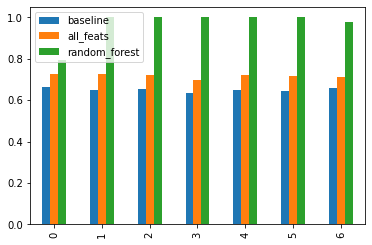

In [345]:
results_df.plot(y=["baseline", "all_feats", "random_forest"], kind="bar")

**Life Cycle of Project**

Loading Packages and Data

Missing Value Imputation using mode value

Preprocessing of data (dummy with mutiple categories to keep data stricty numeric)

Normalize data using standardscalar to avoid outilers

Model building (logistic Regression and Random Forest)

Evauation metrics (f1_score - weighted average of precision and recall and roc_auc_score for logistic Regression)

Metrics roc_auc_score for Random Forest


# Conclusion

Here, we can see that the random forest model is giving the best result for each fold

This model is 99% in agreement with the demand of the actual business model.